**Montagem do Google Drive:**
   - O comando `drive.mount('/content/drive')` é utilizado para montar o Google Drive no Google Colab, permitindo acessar e salvar arquivos diretamente no Drive.
   - Após a execução, o Google Drive foi montado com sucesso no diretório `/content/drive`.

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Instalação do Tesseract OCR:**
   - O comando `!sudo apt install tesseract-ocr` instala o Tesseract OCR, um mecanismo de reconhecimento óptico de caracteres (OCR) de código aberto.
   - A instalação inclui pacotes adicionais necessários:
     - `tesseract-ocr-eng`: Suporte para a língua inglesa.
     - `tesseract-ocr-osd`: Suporte para detecção de orientação do script.
   - Após a instalação, o Tesseract está configurado e pronto para ser utilizado no ambiente Colab.

In [26]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (14.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

**Instalação do Pytesseract:**
   - O comando `!pip install pytesseract` é utilizado para instalar a biblioteca `pytesseract`, que serve como um wrapper do Tesseract OCR para facilitar o uso em Python.
   - Como o `pytesseract` já estava instalado no ambiente, nenhuma nova instalação foi realizada.

In [27]:
!pip install pytesseract

**Importação de Bibliotecas:**
   - As bibliotecas importadas incluem:
     - `pickle`: Utilizada para desserializar (carregar) os objetos salvos em arquivos `.pkl`.
     - `matplotlib.pyplot`: Biblioteca para visualização de gráficos e imagens.
     - `numpy`: Biblioteca para manipulação eficiente de arrays e operações numéricas.
     - `cv2`: OpenCV, utilizado para operações relacionadas a imagens.

**Desserializando o Objeto Pickle:**
   - A função `open` abre o arquivo `imagens_pickle (1).pkl` em modo leitura binária (`'rb'`).
   - O método `pickle.load(file)` desserializa o conteúdo do arquivo, carregando-o como um objeto Python. Neste caso, ele carrega um dicionário que contém arrays numéricos associados à chave `'imagem_original'`.

**Exibição dos Dados Desserializados:**
   - A variável `images` agora contém os dados desserializados, que são então exibidos com `print(images)`. O conteúdo mostrado inclui uma imagem em formato de array NumPy, com valores de intensidade dos pixels (valores flutuantes entre 0 e 1, indicando escala de cor ou níveis de cinza)

In [28]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Desserializando o objeto
with open('/content/imagens_pickle (1).pkl', 'rb') as file:
    images = pickle.load(file)

# Agora 'dados' contém o dicionário que foi salvo
print(images)

{'imagem_original': array([[[0.39215686, 0.39215686, 0.39215686],
        [0.39607843, 0.39607843, 0.39607843],
        [0.39215686, 0.39215686, 0.39215686],
        ...,
        [0.31764706, 0.31764706, 0.31764706],
        [0.31372549, 0.31372549, 0.31372549],
        [0.30980392, 0.30980392, 0.30980392]],

       [[0.39607843, 0.39607843, 0.39607843],
        [0.39215686, 0.39215686, 0.39215686],
        [0.39215686, 0.39215686, 0.39215686],
        ...,
        [0.30588235, 0.30588235, 0.30588235],
        [0.30196078, 0.30196078, 0.30196078],
        [0.29803922, 0.29803922, 0.29803922]],

       [[0.37647059, 0.37647059, 0.37647059],
        [0.38039216, 0.38039216, 0.38039216],
        [0.38039216, 0.38039216, 0.38039216],
        ...,
        [0.30196078, 0.30196078, 0.30196078],
        [0.30980392, 0.30980392, 0.30980392],
        [0.31372549, 0.31372549, 0.31372549]],

       ...,

       [[0.37647059, 0.37647059, 0.37647059],
        [0.38431373, 0.38431373, 0.38431373],
  

 **Separação das Imagens:**
   - `imagem_original = images['imagem_original']`: A imagem original é recuperada do dicionário desserializado.
   - `imagem_seg = images['imagem_segmentada']`: A imagem segmentada (gerada pelo modelo) também é extraída do dicionário.
  

In [29]:
imagem_original= images['imagem_original']
imagem_seg= images['imagem_segmentada']

**Conversão da Imagem Original para Escala de Cinza:**
   - A imagem original, que está normalizada (valores entre 0 e 1), é convertida para o formato `uint8` (valores entre 0 e 255) com `astype(np.uint8)`.
   - A função `cv2.cvtColor` é utilizada para converter a imagem de RGB para escala de cinza.
   - `np.stack` é aplicado para garantir que a imagem tenha três canais de cor (mantendo a consistência no formato de imagens RGB).

In [30]:
img_original_uint8 = (imagem_original * 255).astype(np.uint8)
img_grayscale = cv2.cvtColor(img_original_uint8, cv2.COLOR_RGB2GRAY)
img_grayscale = np.stack((img_grayscale,) * 1, axis=-1)

print(img_grayscale.shape)

(128, 128, 1)


**Preparação da Máscara Segmentada:**
   - A função `np.squeeze` remove dimensões extras da máscara segmentada.
   - `np.stack` é utilizado novamente para garantir que a máscara tenha três canais (seguindo o padrão de imagens RGB).

In [31]:
mascara = np.squeeze(imagem_seg)
mascara_rgb = np.stack((mascara,) * 1, axis=-1)
print(mascara_rgb.shape)

(128, 128, 1)


**Visualização da Imagem Segmentada:**
   - `plt.subplot(1, 3, 3)` define o layout de exibição para três subplots em uma única linha, mas aqui está sendo utilizada apenas uma subplot.
   - `plt.imshow(imagem_seg, cmap='gray')` exibe a imagem segmentada em escala de cinza.
   - A função `plt.title` define o título da imagem como "Máscara Segmentada pelo Modelo".
   - `plt.axis('off')` desativa a exibição dos eixos para melhorar a visualização.

(-0.5, 127.5, 127.5, -0.5)

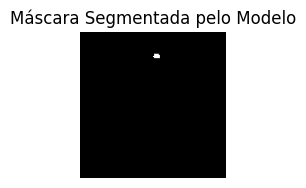

In [32]:
plt.subplot(1, 3, 3)
plt.imshow(imagem_seg, cmap='gray')
plt.title('Máscara Segmentada pelo Modelo')
plt.axis('off')

**Cálculo do Total de Pixels:**
   - O comando `np.prod(imagem_seg.shape)` calcula o número total de pixels na imagem segmentada multiplicando as dimensões da imagem. Isso resulta no número de elementos no array (número de pixels).
   - O resultado impresso é `16384`, que corresponde a uma imagem de `(128 x 128)` pixels.

In [34]:
total_pixels = np.prod(imagem_seg.shape)
print(total_pixels)

16384


**Função `not_eyes`:**
   - Esta função recebe uma imagem e uma máscara como parâmetros.
   - Ela cria uma cópia da imagem original (`np.copy(image)`).
   - Em seguida, os pixels que **não** correspondem aos olhos (definidos pela máscara) são definidos como zero (preto). Isso é feito usando `mask != 0`, ou seja, onde a máscara não for zero, os pixels da imagem são mantidos, e os outros são zerados.
   - A imagem modificada é retornada.


In [36]:
def not_eyes(image, mask):
    # Cria uma cópia da imagem original
    masked_image = np.copy(image)
    # Define os pixels como preto onde a máscara é zero
    masked_image[mask != 0] = 0
    return masked_image

**Função `only_eyes`:**
   - Similar à função `not_eyes`, mas agora a lógica se inverte: os pixels onde a máscara for zero são definidos como preto, enquanto os demais são mantidos.
   - Isso isola os pixels que correspondem aos olhos na imagem.
   - A imagem modificada também é retornada.


In [37]:
def only_eyes(image, mask):
    # Cria uma cópia da imagem original
    masked_image = np.copy(image)
    # Define os pixels como preto onde a máscara é zero
    masked_image[mask == 0] = 0
    return masked_image

 **Aplicação da Função `only_eyes`:**
   - A função `only_eyes` é chamada com `img_grayscale` (a imagem em escala de cinza) e `mascara_rgb` (a máscara RGB) como argumentos. O resultado é salvo na variável `img_olhos`, que contém a imagem onde apenas os olhos foram mantidos, e o restante foi removido (zerado).

In [38]:
img_olhos= only_eyes(img_grayscale, mascara_rgb)

### Visualização de Imagens com Segmentação e Temperatura

**Exibição da Imagem Original:**
   - `plt.subplot(1, 3, 3)` configura uma grade com uma linha e três colunas para subplots, e seleciona a terceira posição (mas apenas uma imagem é exibida neste exemplo).
   - `plt.imshow(img_grayscale, cmap='gray')` exibe a imagem original em escala de cinza.
   - O título da imagem é definido como "Imagem original" usando `plt.title`.
   - `plt.show()` renderiza e exibe a imagem na tela.

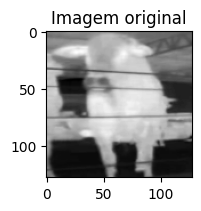

In [39]:
plt.subplot(1, 3, 3)
plt.imshow(img_grayscale, cmap='gray')
plt.title('Imagem original')
plt.show()

**Exibição da Imagem Original:**
   - `plt.subplot(1, 3, 3)` configura uma grade com uma linha e três colunas para subplots, e seleciona a terceira posição (mas apenas uma imagem é exibida neste exemplo).
   - `plt.imshow(img_grayscale, cmap='gray')` exibe a imagem original em escala de cinza.
   - O título da imagem é definido como "Imagem original" usando `plt.title`.
   - `plt.show()` renderiza e exibe a imagem na tela.

(-0.5, 127.5, 127.5, -0.5)

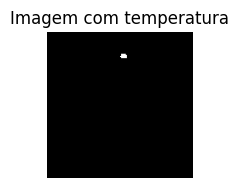

In [40]:
plt.subplot(1, 3, 3)
plt.imshow(mascara_rgb, cmap='gray')
plt.title('Imagem com temperatura')
plt.axis('off')


 **Exibição da Imagem com Olhos Isolados:**
   - O procedimento é o mesmo, porém agora exibindo a imagem resultante da função `only_eyes`, que isola apenas os olhos na imagem.
   - `plt.imshow(img_olhos, cmap='gray')` exibe a imagem com os olhos destacados.
   - O título "Imagem com temperatura" é repetido, mas pode ser ajustado para algo mais descritivo como "Imagem com olhos isolados".
   - `plt.axis('off')` novamente remove os eixos para uma visualização limpa.

(-0.5, 127.5, 127.5, -0.5)

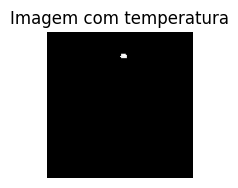

In [41]:
plt.subplot(1, 3, 3)
plt.imshow(img_olhos, cmap='gray')
plt.title('Imagem com temperatura')
plt.axis('off')


**Visualizando os Valores Únicos dos Pixels na Imagem:**
   - `np.unique(img_olhos)` retorna os valores únicos presentes na matriz `img_olhos`. Esses valores representam os diferentes níveis de intensidade de pixel na imagem onde os olhos estão segmentados.
   - Os valores exibidos variam de 0 a 180, com 0 representando pixels pretos (sem interesse) e os outros valores representando diferentes níveis de intensidade nos olhos.

In [45]:
print(np.unique(img_olhos))

[  0 166 167 169 170 171 172 173 174 175 176 179 180]


 **Análise dos 10% Pixels Mais Escuros:**
   - `pixels_not_black = img_olhos[img_olhos > 0]`: Esta linha seleciona todos os pixels da imagem `img_olhos` que são maiores que zero, ou seja, exclui os pixels pretos.
   - `pixels_ordered = np.sort(pixels_not_black)`: Os pixels restantes são ordenados do menor para o maior.
   - `pixels_ordered_reverse = pixels_ordered[::-1]`: A lista de pixels ordenados é invertida para que os valores mais altos venham primeiro.
   - `pixels_10_percent = pixels_ordered_reverse[:int(len(pixels_ordered_reverse) * 0.1)]`: São selecionados os 10% dos pixels mais escuros (menores valores) da imagem invertida.
   - O código imprime a lista dos 10% de pixels mais escuros e também o tamanho dessa lista (quantidade de pixels).

**Cálculo da Média dos Pixels que Não São Pretos:**
   - `media_pixels = np.mean(pixels_10_percent)`: Calcula a média dos valores dos pixels que pertencem aos 10% mais escuros.
   - A média é então impressa, fornecendo uma estimativa da intensidade média dos pixels que não são pretos e que estão entre os 10% mais escuros.

In [46]:
pixels_not_black= img_olhos[img_olhos > 0]
pixels_ordered= np.sort(pixels_not_black)
pixels_ordered_reverse= pixels_ordered[::-1]
pixels_10_percent= pixels_ordered_reverse[:int(len(pixels_ordered_reverse)*0.1)]
print(f"10% dos pixels mais escuros: {pixels_10_percent}")
print(len(pixels_ordered))
media_pixels= np.mean(pixels_10_percent)
print(f"Média dos pixels que não são pretos: {media_pixels}")

10% dos pixels mais escuros: [180 180]
20
Média dos pixels que não são pretos: 180.0


### Extração do Texto das Temperaturas na Imagem

**Carregar a Imagem:**
   - O caminho da imagem é especificado na variável `image_path`, e a função `cv2.imread(image_path)` é usada para carregar a imagem do disco.
   - A imagem utilizada aqui parece ser um frame que contém valores de temperatura a serem extraídos.

**Pré-processamento da Imagem:**
   - A imagem carregada é convertida para escala de cinza com `cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)`, o que facilita a aplicação de técnicas de thresholding e melhora a eficiência do OCR.
   - Um thresholding binário inverso é aplicado com `cv2.threshold`, onde todos os pixels com valor acima de 150 são convertidos para 255 (branco), e os abaixo de 150 são convertidos para 0 (preto). Isso melhora o contraste para a extração do texto.

**Extração de Texto com Tesseract:**
   - A função `pytesseract.image_to_string` é usada para extrair o texto da imagem processada (`thresh`).
   - A opção `config='--psm 6'` configura o modo de análise de layout do Tesseract, sendo o modo 6 ideal para blocos de texto uniforme, como números de temperatura.

**Exibição do Texto Extraído:**
   - O texto extraído pela Tesseract é impresso com `print(text)`.

**Uso de Expressão Regular (Regex) para Filtrar Temperaturas:**
   - A biblioteca `re` é importada para uso de expressões regulares.
   - Um padrão de regex `\d{2}\.\d{2}` é definido para capturar temperaturas no formato `XX.XX` (dois dígitos, seguidos por um ponto e mais dois dígitos).
   - A função `re.findall` é usada para procurar todas as correspondências desse padrão no texto extraído.

**Exibição das Temperaturas Encontradas:**
   - As temperaturas capturadas pela expressão regular são impressas com `print(temperaturas)`.


In [47]:
import cv2
import pytesseract

image_path = '/content/drive/MyDrive/codigo_temperatura/frame_9766.png'
image = cv2.imread(image_path)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

text = pytesseract.image_to_string(thresh, config='--psm 6')

# Imprimir o texto extraído
print("Texto extraído:")
print(text)

import re

pattern = r"\d{2}\.\d{2}"

temperaturas = re.findall(pattern, text)

print("Temperaturas encontradas:")
print(temperaturas)

Texto extraído:
_ + * “Me pt
vale 41.870

—— . |
23.570

IPCamera 02

Temperaturas encontradas:
['41.87', '23.57']


### Análise da Barra de Cores para Identificação de Temperaturas Mínimas e Máximas

**Carregar a Imagem:**
   - O caminho da imagem é definido em `image_path`, e a função `cv2.imread(image_path)` carrega a imagem da barra de temperatura.
   - A imagem carregada contém a barra de cores, que é utilizada para mapear valores de temperatura.

**Conversão para Escala de Cinza:**
   - A imagem carregada é convertida para escala de cinza com `cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)`. Isso simplifica o processamento ao reduzir as informações da imagem para uma única camada de intensidade de cor.

**Definir a Região da Barra de Cores:**
   - O código define a região da barra de cores na imagem com `bar_region = gray_image[:, -50:]`. Aqui, assumimos que a barra de cores está nos últimos 50 pixels à direita da imagem.
   - Essa parte seleciona todas as linhas (dimensão vertical) e apenas os últimos 50 pixels horizontais, correspondendo à barra de cores.

   **Observação:** A posição da barra de cores pode variar dependendo da imagem, então esse corte precisa ser ajustado conforme necessário.

**Encontrar os Valores Mínimos e Máximos de Pixel:**
   - `min_val = np.min(bar_region)` encontra o valor de pixel mais escuro na região da barra (correspondente à temperatura mínima).
   - `max_val = np.max(bar_region)` encontra o valor de pixel mais claro na região da barra (correspondente à temperatura máxima).

**Exibir os Valores Mínimos e Máximos de Pixel:**
   - O código imprime os valores mínimo e máximo de pixel, que representam as temperaturas mínima e máxima mapeadas pela barra de cores.

**Visualizar a Barra de Cores Isolada:**
   - A região da barra de cores é exibida com `plt.imshow(bar_region, cmap='gray')` em escala de cinza, facilitando a visualização dos valores de pixel correspondentes às temperaturas.
   - O título da imagem é definido como "Barra de cores isolada" e `plt.show()` exibe a barra de cores cortada da imagem original.


Valor de pixel mais escuro (temperatura mínima): 26
Valor de pixel mais claro (temperatura máxima): 252


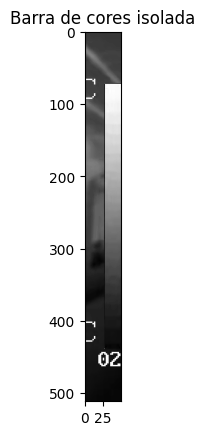

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/Modelo_segmentacao_phd/frame_7307.png'
image = cv2.imread(image_path)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

bar_region = gray_image[:, -50:]

min_val = np.min(bar_region)
max_val = np.max(bar_region)

print(f"Valor de pixel mais escuro (temperatura mínima): {min_val}")
print(f"Valor de pixel mais claro (temperatura máxima): {max_val}")

plt.imshow(bar_region, cmap='gray')
plt.title("Barra de cores isolada")
plt.show()

**Criação do Dicionário de Relacionamento `relation_temp`:**
   - Um dicionário `relation_temp` é criado para mapear os valores de pixel (mínimo e máximo) às respectivas temperaturas extraídas da imagem.
   - O valor mínimo de pixel (`min_val`) é associado à temperatura mais baixa (`temperaturas[1]`), e o valor máximo de pixel (`max_val`) é associado à temperatura mais alta (`temperaturas[0]`).
   - O dicionário é impresso e exibe um mapeamento como `{26: '23.57', 252: '41.87'}`, onde 26 e 252 são os valores de pixel, e as temperaturas são exibidas em graus Celsius.

   **Extração e Conversão de Temperaturas Mínima e Máxima:**
   - `temp_min` e `temp_max` são extraídas do array `temperaturas`, convertendo os valores de string para `float`, para facilitar os cálculos posteriores.
   - A temperatura mínima corresponde ao segundo valor do array (`temperaturas[1]`) e a temperatura máxima ao primeiro valor (`temperaturas[0]`).
   - As temperaturas mínima e máxima são então impressas: `23.57ºC` e `41.87ºC`.

In [49]:
relation_temp= dict()

relation_temp[min_val]= temperaturas[1]
relation_temp[max_val]= temperaturas[0]

relation_temp

{26: '23.57', 252: '41.87'}

**Extração e Conversão de Temperaturas Mínima e Máxima:**
   - `temp_min` e `temp_max` são extraídas do array `temperaturas`, convertendo os valores de string para `float`, para facilitar os cálculos posteriores.
   - A temperatura mínima corresponde ao segundo valor do array (`temperaturas[1]`) e a temperatura máxima ao primeiro valor (`temperaturas[0]`).
   - As temperaturas mínima e máxima são então impressas: `23.57ºC` e `41.87ºC`.

In [50]:
temp_min = float(temperaturas[1])
temp_max = float(temperaturas[0])

print(f"Temperatura mínima: {temp_min}°C")
print(f"Temperatura máxima: {temp_max}°C")

temperatura_calculada = ((media_pixels - min_val) / (max_val - min_val)) * (temp_max - temp_min) + temp_min

print(f"A temperatura correspondente à média dos pixels é: {temperatura_calculada:.2f}°C")

Temperatura mínima: 23.57°C
Temperatura máxima: 41.87°C
A temperatura correspondente à média dos pixels é: 36.04°C


### Adição de Texto com a Temperatura Calculada em uma Imagem

**Definir a Posição do Texto:**
   - `posicao_texto = (1, 120)` define as coordenadas (x, y) onde o texto será exibido na imagem. Neste caso, o texto será posicionado na altura de 120 pixels e 1 pixel da borda esquerda.

**Definir a Fonte do Texto:**
   - `cv2.FONT_HERSHEY_SIMPLEX` é a fonte escolhida para o texto a ser inserido na imagem. Essa é uma fonte simples e legível disponível no OpenCV.

**Definir a Cor do Texto:**
   - A cor do texto é especificada em formato BGR (Blue, Green, Red) como `(255, 255, 255)`, que representa a cor branca.

**Definir o Tamanho e Espessura da Fonte:**
   - `tamanho_fonte = 0.33`: Define o tamanho do texto na imagem.
   - `espessura = 1`: Define a espessura das linhas que formam o texto.

**Criar uma Cópia da Imagem:**
   - `nova_imagem = img_grayscale.copy()` cria uma cópia da imagem em escala de cinza, na qual o texto será adicionado. Isso garante que a imagem original não seja modificada.

**Escrever o Texto na Imagem:**
   - `cv2.putText(nova_imagem, f"Temperatura: {temperatura_calculada:.2f} C", posicao_texto, fonte, tamanho_fonte, cor, espessura)` adiciona o texto da temperatura calculada à imagem.
   - O texto exibido será algo como `"Temperatura: 36.04 C"`, sendo `temperatura_calculada` o valor previamente calculado, exibido com duas casas decimais.

**Exibir a Imagem com o Texto:**
   - `plt.imshow(nova_imagem, cmap='gray')` exibe a imagem em escala de cinza com o texto sobreposto.
   - `plt.title('Imagem com temperatura')` define o título da imagem exibida.
   - `plt.axis('off')` remove os eixos para que o foco seja a imagem com o texto.

(-0.5, 127.5, 127.5, -0.5)

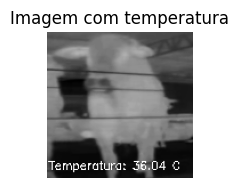

In [51]:
import cv2

posicao_texto = (1, 120)

# Definir a fonte do texto
fonte = cv2.FONT_HERSHEY_SIMPLEX

cor = (255, 255, 255)

tamanho_fonte = 0.33
espessura = 1

nova_imagem = img_grayscale.copy()

cv2.putText(nova_imagem, f"Temperatura: {temperatura_calculada:.2f} C", posicao_texto, fonte, tamanho_fonte, cor, espessura)

plt.subplot(1, 3, 3)
plt.imshow(nova_imagem, cmap='gray')
plt.title('Imagem com temperatura')
plt.axis('off')

# # Se você quiser salvar a imagem com o texto
# cv2.imwrite("imagem_com_temperatura.png", img_grayscale)
